# Apriori

In [20]:
import numpy as np
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 
import sqlite3
import matplotlib.pyplot as plt

In [17]:
conn = sqlite3.connect('/Users/pep/Downloads/Great_Outdoors_Data_SQLite/go_sales.sqlite')

order_details = pd.read_sql_query('SELECT * FROM order_details', conn)
order_details = order_details[['ORDER_NUMBER', 'PRODUCT_NUMBER']]

products = pd.read_sql_query('SELECT * FROM product', conn)
products = products[['PRODUCT_NUMBER', 'PRODUCT_NAME']]
dummy_products = pd.get_dummies(products['PRODUCT_NAME'])
products = products.drop('PRODUCT_NAME', axis=1)
products = pd.concat([products, dummy_products], axis=1)
products

,PRODUCT_NUMBER,Aloe Relief,Bear Edge,Bear Survival Edge,Blue Steel Max Putter,Blue Steel Putter,BugShield Extreme,BugShield Lotion,BugShield Lotion Lite,BugShield Natural,...,TrailChef Canteen,TrailChef Cook Set,TrailChef Cup,TrailChef Deluxe Cook Set,TrailChef Double Flame,TrailChef Kettle,TrailChef Kitchen Kit,TrailChef Single Flame,TrailChef Utensils,TrailChef Water Bag
0,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,10,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,100,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,101,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,102,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,95,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
111,96,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
112,97,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113,98,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
merged_data = pd.merge(order_details, products, on='PRODUCT_NUMBER', how='inner')
merged_data = merged_data.drop(['PRODUCT_NUMBER'], axis=1)
merged_data = merged_data.groupby('ORDER_NUMBER').aggregate('max')

frequent_itemsets = apriori(merged_data, min_support=0.01, verbose=True, use_colnames=True)

sorted_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
sorted_itemsets = sorted_itemsets[sorted_itemsets['itemsets'].apply(lambda x: len(x) > 1)]

sorted_itemsets

Processing 193413 combinations | Sampling itemset size 3


,support,itemsets
1259,0.029104,"(Granite Axe, Granite Extreme)"
949,0.025933,"(Firefly Climbing Lamp, Granite Extreme)"
1414,0.025746,"(Granite Grip, Granite Hammer)"
217,0.025746,"(Hailstorm Titanium Irons, Blue Steel Max Putter)"
945,0.025373,"(Granite Axe, Firefly Climbing Lamp)"
...,...,...
1790,0.010075,"(Star Dome, Star Gazer 3)"
1061,0.010075,"(Firefly Multi-light, Hibernator Pad)"
1788,0.010075,"(TrailChef Utensils, Single Edge)"
1052,0.010075,"(Glacier Basic, Firefly Multi-light)"


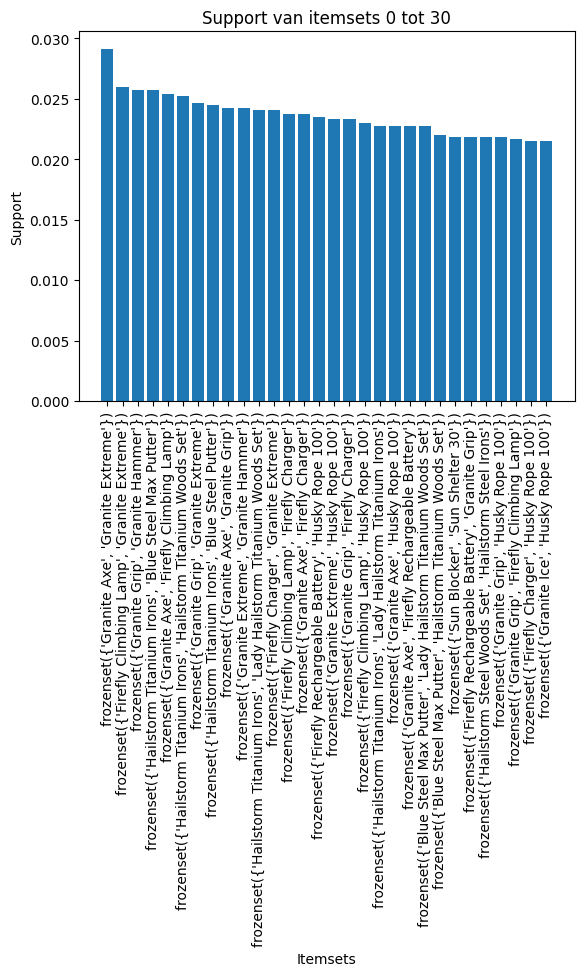

In [33]:
#maximale waarde is 1792
min = 0
max = 30

plt.bar(x = range(min, max), height = sorted_itemsets['support'][min:max], tick_label = sorted_itemsets['itemsets'][min:max])
plt.xticks(rotation=90)
plt.title(f'Support van itemsets {min} tot {max}')
plt.ylabel('Support')
plt.xlabel('Itemsets')
plt.show()

In [31]:
pd.set_option('display.max_colwidth', None)
rules = association_rules(frequent_itemsets, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3582,"(Lady Hailstorm Titanium Irons, Blue Steel Max Putter)",(Lady Hailstorm Titanium Woods Set),0.019590,0.059142,0.010448,0.533333,9.017876,0.009289,2.016125,0.906874
3583,"(Lady Hailstorm Titanium Irons, Lady Hailstorm Titanium Woods Set)",(Blue Steel Max Putter),0.020336,0.066791,0.010448,0.513761,7.692071,0.009090,1.919241,0.888055
3584,"(Blue Steel Max Putter, Lady Hailstorm Titanium Woods Set)",(Lady Hailstorm Titanium Irons),0.022761,0.054664,0.010448,0.459016,8.397023,0.009204,1.747439,0.901428
2861,(Lady Hailstorm Titanium Irons),(Hailstorm Titanium Irons),0.054664,0.077985,0.022761,0.416382,5.339256,0.018498,1.579827,0.859703
2863,(Lady Hailstorm Titanium Woods Set),(Hailstorm Titanium Irons),0.059142,0.077985,0.024067,0.406940,5.218179,0.019455,1.554674,0.859175
...,...,...,...,...,...,...,...,...,...,...
489,(Canyon Mule Carryall),(Sun Blocker),0.106903,0.084142,0.010261,0.095986,1.140765,0.001266,1.013102,0.138166
441,(Canyon Mule Carryall),(Granite Carabiner),0.106903,0.061567,0.010075,0.094241,1.530700,0.003493,1.036073,0.388204
430,(Canyon Mule Carryall),(Glacier Deluxe),0.106903,0.069590,0.010075,0.094241,1.354238,0.002635,1.027216,0.292888
463,(Canyon Mule Carryall),(Hibernator Self - Inflating Mat),0.106903,0.071642,0.010075,0.094241,1.315445,0.002416,1.024950,0.268505


## Links:
https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/ \
https://www.geeksforgeeks.org/implementing-apriori-algorithm-in-python/ \
https://www.kdnuggets.com/2016/04/association-rules-apriori-algorithm-tutorial.html \
https://towardsdatascience.com/apriori-association-rule-mining-explanation-and-python-implementation-290b42afdfc6
